# Shortest distance among points

https://projecteuler.net/problem=816

The distance to use is unspecified but given the example value I'll assume i need to compute the euclidean distance, not the taxicab distance

It is clear that the bruteforce approach won't scale, because iterating on `2 choose 2_000_000` possible couples of points `Pk` will take forever

ie, the naive approach scales in quadratic time

## Idea 1: plot the RNG values and detect a pattern

In [65]:
import matplotlib.pyplot as plt

In [66]:
def s(n:int):
    return 290797 if n==0 else (s(n-1)**2) % 50_515_093


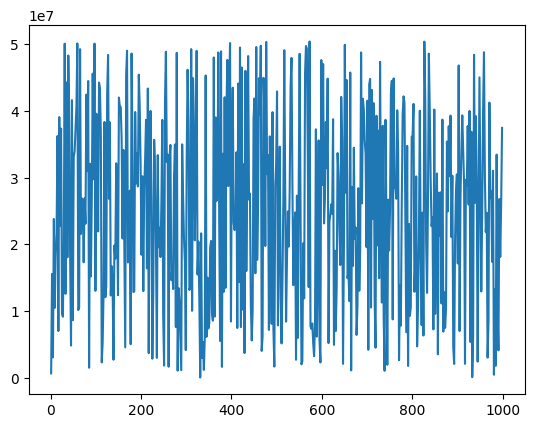

In [67]:
x, y =list(range(1,1000,2)), list(map(s, range(1,1000,2)))

plt.plot(x,y);
    

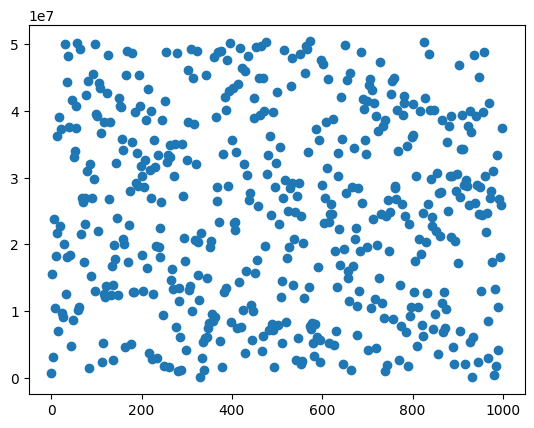

In [68]:
x, y =list(range(0,1000,2)), list(map(s, range(1,1000,2)))

plt.scatter(x,y);

I don't see a clear pattern

Seeing the scatter plot makes me think of the KNN algorithm, but the KNN computes distances from a single point to all points in the dataset, while here we need
to compute all distances betweens all pairs of points, which is far more compute-intense

## Idea 2

see if the RNG starts repeating itself, and if so, if this happens before the 4million-th value then I'll memoize to speed up the computations

In [69]:
seen=set()
s=290797
c=0
while s not in seen:
    seen.add(s)
    s = (s**2) % 50515093
    c+=1
c

6308949

Past the 6_308_949th value, this RNG starts all over again. But I only need the first 2 million `Pk`s, that is, the first 4 million `sk`, so memoizing will be useless

## Idea 3

Generate all 2 million points `Pk` as (x,y) tuples, sort them (hopefully that'll scale), then the shortest distances candidates must be among neighbour tuples (direct neighbors, then let's examine distance-2 neighbors if needed, and so on) in the list.
That'll be much more manageable as it'll require only 1_999_999 iterations as opposed to 2 choose 2 million

In [ ]:
from math import sqrt

In [74]:
def compute_min_distance(nb_points: int) -> float:

    points = []
    s=None
    for _ in range(nb_points):
        point=[]
        s = 290797 if s is None else (s**2) % 50515093
        point.append(s)
        s = 290797 if s is None else (s**2) % 50515093
        point.append(s)
        points.append(tuple(point))
        
    points.sort()

    min_dist = float('inf')
    for i in range(1, len(points)):
        (xa,ya),(xb,yb) = points[i], points[i-1]
        dist = sqrt((ya-yb)**2 + (xa-xb)**2)
        if dist < min_dist:
            min_dist = dist
    ans = round(min_dist, 9)
    print(ans)
    return ans

In [75]:
assert compute_min_distance(14) == 546446.466846479

546446.466846479


In [76]:
compute_min_distance(2_000_000)

20.880613018


20.880613018

I had another idea, which was to place the generated points within buckets and then iterate on buckets. But idea 3 solved it.

After solving it I saw in this problem's PE thread that it is a [standard divide-ad-conquer problem](https://en.wikipedia.org/wiki/Closest_pair_of_points_problem) solvable in O(n log(n))